In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
new_df = pd.read_csv('new_df_for_data_analysis.csv', encoding='utf-8')

In [4]:
new_df = pd.read_csv('new_df_for_data_analysis.csv', encoding='utf-8').drop(columns=['Unnamed: 0'])

In [99]:
new_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,V_ADMINBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOMS,C-REACTIVE PROTEIN INCREASED,OXYGEN SATURATION DECREASED,PNEUMONIA,ELECTROCARDIOGRAM ABNORMAL,APHASIA,ECHOCARDIOGRAM,INTENSIVE CARE,HYPOTENSION,RESPIRATORY TRACT CONGESTION,UNRESPONSIVE TO STIMULI,DIZZINESS,RESUSCITATION,PYREXIA,TOMOGRAM TEST,WHITE BLOOD CELL COUNT NORMAL,PAIN,ANGIOGRAM,LABORATORY TEST,MYOCARDIAL INFARCTION,URINE ANALYSIS,HYPOXIA,COUGH,FULL BLOOD COUNT,DEEP VEIN THROMBOSIS,MENTAL STATUS CHANGES,SEPSIS,RASH,PLATELET COUNT DECREASED,ATRIAL FIBRILLATION,CONDITION AGGRAVATED,FALL,CARDIAC ARREST,PRURITUS,ANOSMIA,SARS-COV-2 TEST NEGATIVE,CEREBROVASCULAR ACCIDENT,SWELLING,METABOLIC FUNCTION TEST,CHEST PROBLEM,FATIGUE,HEMIPARESIS,PAIN IN EXTREMITY,TROPONIN INCREASED,ASTHENIA,CHEST X-RAY NORMAL,HAEMOGLOBIN DECREASED,ARTHRALGIA,HEADACHE,ELECTROCARDIOGRAM,AGEUSIA,ECHOCARDIOGRAM NORMAL,TROPONIN,PARAESTHESIA,NAUSEA,URINARY TRACT INFECTION,PULSE ABSENT,BLOOD CREATININE INCREASED,CHILLS,DYSARTHRIA,SEIZURE,MYALGIA,MRI TEST,BLOOD UREA INCREASED,INJECTION SITE REACTION,DRUG INEFFECTIVE,BLOOD TEST,PULMONARY EMBOLISM,ENDOTRACHEAL INTUBATION,FIBRIN D DIMER INCREASED,DYSPNOEA,CONFUSIONAL STATE,THROMBOSIS,WHITE BLOOD CELL COUNT INCREASED,COVID-19 POSITIVE,HISTORYLIST,TYPE-2 DIABETES,HYPERTENSION,ARTHRITIS,ASTHMA,MIGRAINE,HIGH CHOLESTEROL,ABNORMAL BLOOD PRESSURE,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,GERD,ANXIETY,OBESITY,DEPRESSION,THYROID DISORDER,ANEMIA,DEMENTIA,CANCER,KIDNEY DISEASE,HYPERLIPIDEMIA,HEART DISEASE,COVID-19 POSITIVE HISTORY,PAIN SYMPTOMS,AGE_BAND
0,916600,01/01/2021,TX,33.0,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,PVT,0,0,NONE,0,0,0,0,COVID19,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),"['DYSPHAGIA', 'EPIGLOTTITIS']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,['nan'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,916601,01/01/2021,CA,73.0,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,SEN,1,1,PATIENT RESIDING NURSING FACILITY SEE PATIENT ...,0,0,0,1,COVID19,MODERNA,1,IM,RA,COVID19 (COVID19 (MODERNA)),"['ANXIETY', 'DYSPNOEA']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,['nan'],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
2,916602,01/01/2021,WA,23.0,0,0,0,0,0,0,U,12/31/2020,12/31/2020,SEN,0,0,NONE,0,1,1,1,COVID19,PFIZER\BIONTECH,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),"['CHEST PROBLEM', 'DYSPHAGIA', 'PAIN IN EXTREM...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,['nan'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,916604,01/01/2021,TX,47.0,0,0,0,0,0,0,N,12/22/2020,12/29/2020,PUB,0,0,NAN,0,0,0,0,COVID19,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),"['INJECTION SITE REACTION', 'INJECTION SITE RE...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,['nan'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,916606,01/01/2021,NV,44.0,0,0,0,0,0,0,Y,12/29/2020,12/29/2020,PVT,0,0,NAN,0,0,0,0,COVID19,MODERNA,1,IM,LA,COVID19 (COVID19 (MODERNA)),['SWELLING'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,['nan'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Text(0, 0.5, 'Number')

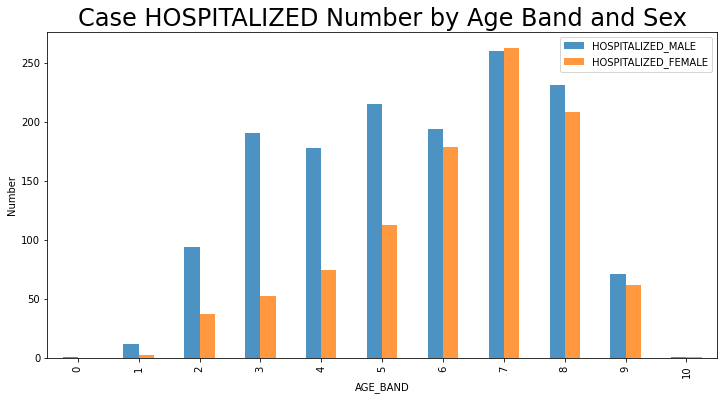

In [8]:
import math
import matplotlib.pyplot as plt
age_band=[]
for item in new_df['AGE_YRS']:
    if math.isnan(item):
        age_band+=[-1]
    else:
        age_band+=[math.floor(item/10)]
new_df['AGE_BAND']=age_band
HOS1=new_df[['SEX','HOSPITAL','AGE_BAND']].copy()

HOS2=HOS1[HOS1['HOSPITAL']==1]
HOS2['SEX']= HOS2['SEX'].apply(str)
HOS_m=[]
HOS_f=[]
for item in  HOS2['SEX']:
    HOS_m+=[item.count('0')]
    HOS_f+=[item.count('1')]
HOS2['HOSPITALIZED_MALE']=HOS_m
HOS2['HOSPITALIZED_FEMALE']=HOS_f
HOS3=HOS2.drop(['SEX','HOSPITAL'],axis=1)
HOS3 = HOS3.groupby(['AGE_BAND']).sum()

HOS3.plot.bar(y=['HOSPITALIZED_MALE','HOSPITALIZED_FEMALE'], alpha=0.8, figsize=(12,6))
plt.title('Case HOSPITALIZED Number by Age Band and Sex', size=24)
plt.ylabel('Number')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Text(0, 0.5, 'Number')

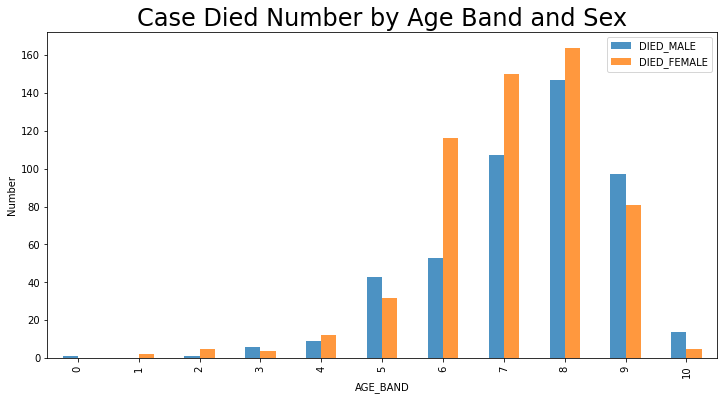

In [17]:
import math
import matplotlib.pyplot as plt
age_band=[]
for item in new_df['AGE_YRS']:
    if math.isnan(item):
        age_band+=[-1]
    else:
        age_band+=[math.floor(item/10)]
new_df['AGE_BAND']=age_band
d1=new_df[['SEX','DIED','AGE_BAND']].copy()

d2=d1[d1['DIED']==1]
d2['SEX']= d2['SEX'].apply(str)
d_m=[]
d_f=[]
for item in  d2['SEX']:
    d_m+=[item.count('0')]
    d_f+=[item.count('1')]
d2['DIED_MALE']=d_m
d2['DIED_FEMALE']=d_f
d3=d2.drop(['SEX','DIED'],axis=1)
d3 = d3.groupby(['AGE_BAND']).sum()

d3.plot.bar(y=['DIED_MALE','DIED_FEMALE'], alpha=0.8, figsize=(12,6))
plt.title('Case Died Number by Age Band and Sex', size=24)
plt.ylabel('Number')

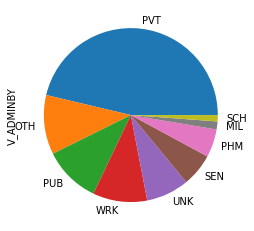

In [19]:
new_df["V_ADMINBY"].value_counts().plot(kind='pie')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


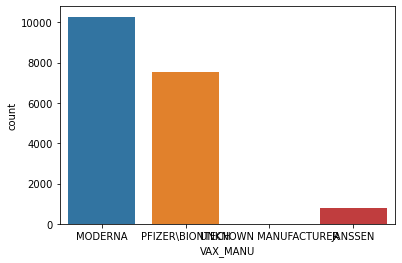

In [24]:
import seaborn as sns
sns.countplot(new_df["VAX_MANU"])

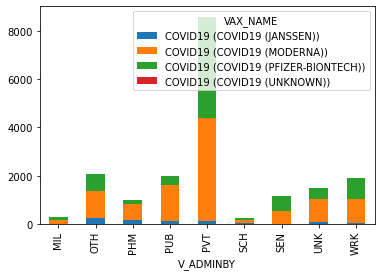

In [26]:
pd.crosstab(new_df["V_ADMINBY"],new_df["VAX_NAME"]).plot(kind='bar',stacked=True)
plt.show()

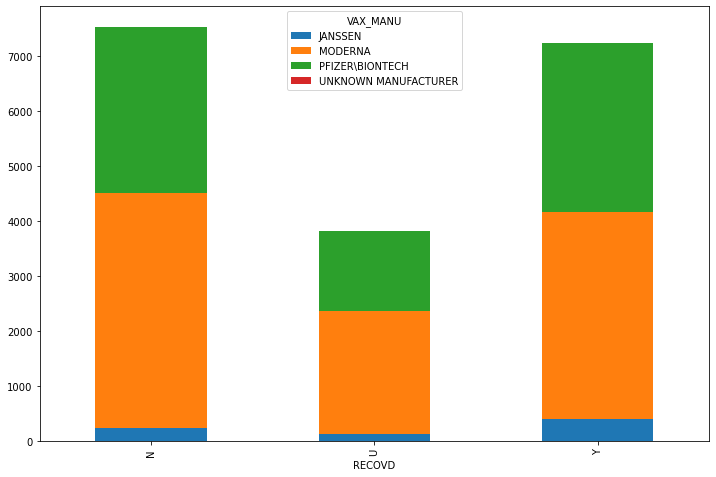

In [28]:
plt.rcParams['figure.figsize'] = (12,8)
pd.crosstab(new_df["RECOVD"],new_df["VAX_MANU"]).plot(kind='bar',stacked=True)
plt.show()

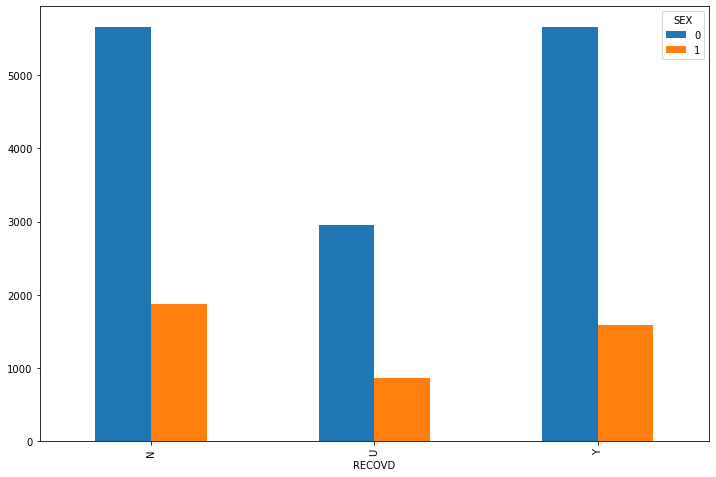

In [29]:
pd.crosstab(new_df["RECOVD"],new_df["SEX"]).plot(kind='bar')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Text(0, 0.5, 'Number')

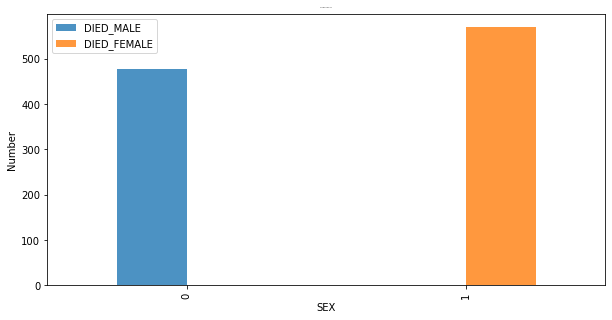

In [36]:
import math
import matplotlib.pyplot as plt

d1=new_df[['SEX','DIED',]].copy()

d2=d1[d1['DIED']==1]
d2['SEX']= d2['SEX'].apply(str)
d_m=[]
d_f=[]
for item in  d2['SEX']:
    d_m+=[item.count('0')]
    d_f+=[item.count('1')]
d2['DIED_MALE']=d_m
d2['DIED_FEMALE']=d_f
d3 = d2.groupby(['SEX']).sum()

d3.plot.bar(y=['DIED_MALE','DIED_FEMALE'], alpha=0.8, figsize=(10,5))
plt.title('Case Died Number Sex', size=1)
plt.ylabel('Number')

In [86]:
import math
import matplotlib.pyplot as plt

d1=new_df[['SEX','HOSPITAL',]].copy()

d2=d1[d1['HOSPITAL']==1]
d2['SEX']= d2['SEX'].apply(str)
d_m=[]
d_f=[]
for item in  d2['SEX']:
    d_m+=[item.count('0')]
    d_f+=[item.count('1')]
d2['HOSPITAL_MALE']=d_m
d2['HOSPITAL_FEMALE']=d_f
d3 = d2.groupby(['SEX']).sum()

d3


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,HOSPITAL,HOSPITAL_MALE,HOSPITAL_FEMALE
SEX,,,
0,1448,1448,0
1,994,0,994


Text(0, 0.5, 'Number')

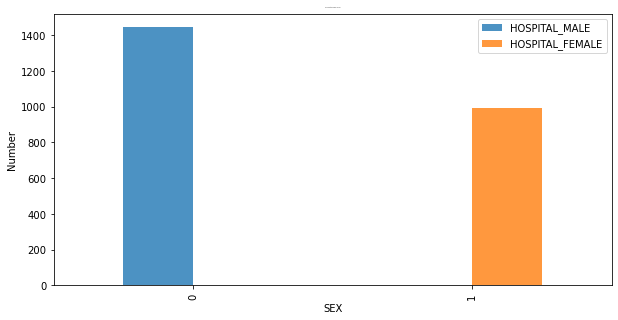

In [87]:
d3.plot.bar(y=['HOSPITAL_MALE','HOSPITAL_FEMALE'], alpha=0.8, figsize=(10,5))
plt.title('Case Hospital Number by Sex', size=1)
plt.ylabel('Number')

In [70]:
new_df['VAX_MANU'].value_counts()

MODERNA                 10272
PFIZER\BIONTECH          7546
JANSSEN                   774
UNKNOWN MANUFACTURER        1
Name: VAX_MANU, dtype: int64

In [92]:
import math
import matplotlib.pyplot as plt

d1=new_df[['DIED','VAX_MANU']].copy()
d1 = d1[d1['DIED']==1]
d2 = d1.groupby(['VAX_MANU']).sum()
d2


,DIED
VAX_MANU,
JANSSEN,11
MODERNA,584
PFIZER\BIONTECH,453
UNKNOWN MANUFACTURER,1


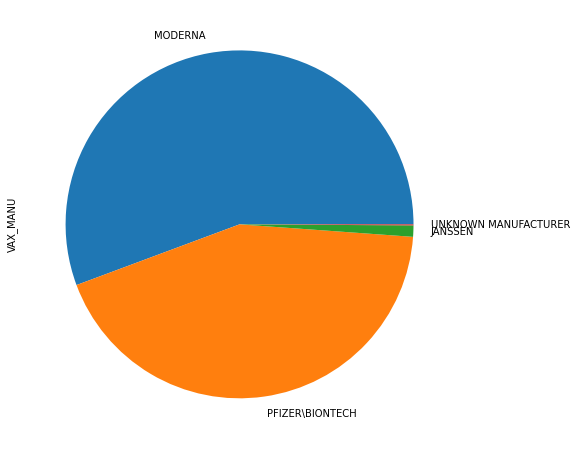

In [94]:
d1["VAX_MANU"].value_counts().plot(kind='pie')

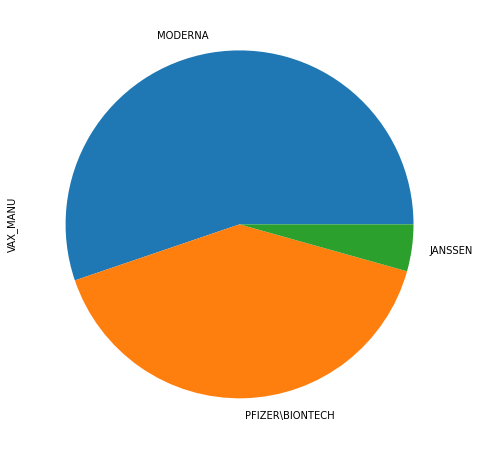

In [96]:
import math
import matplotlib.pyplot as plt

d1=new_df[['DIED','VAX_MANU']].copy()
d1=d1[d1['DIED']==0]
d2 = d1.groupby(['VAX_MANU']).count()
d1["VAX_MANU"].value_counts().plot(kind='pie')

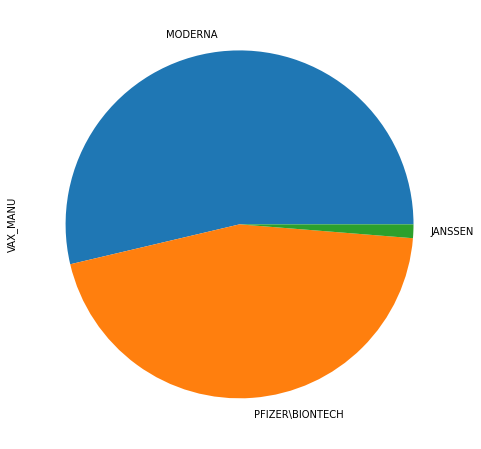

In [97]:
import math
import matplotlib.pyplot as plt

d1=new_df[['HOSPITAL','VAX_MANU']].copy()
d1 = d1[d1['HOSPITAL']==1]
d2 = d1.groupby(['VAX_MANU']).sum()
d1["VAX_MANU"].value_counts().plot(kind='pie')

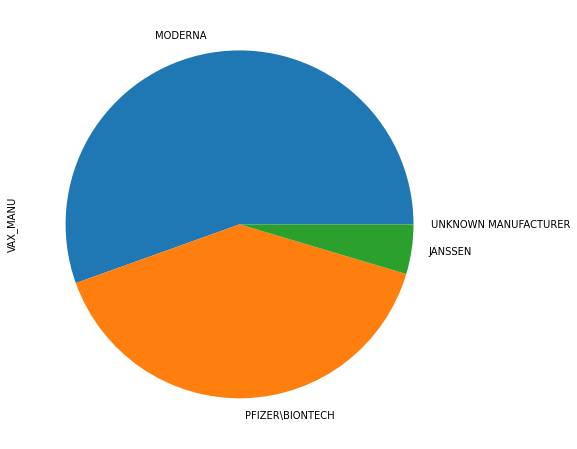

In [98]:
import math
import matplotlib.pyplot as plt

d1=new_df[['HOSPITAL','VAX_MANU']].copy()
d1 = d1[d1['HOSPITAL']==0]
d2 = d1.groupby(['VAX_MANU']).sum()
d1["VAX_MANU"].value_counts().plot(kind='pie')